In [150]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.svm import SVC
%matplotlib inline

In [151]:
df=pd.read_csv("numeric heart disease.csv")

In [152]:
df.head(5)

,age,Sex,chestpaintype,Resting blood pres,Cholesterol,fasting blood sugar < 120?,resting ecg,max heart rate,exercise induced angina,oldpeak,slope,number of vessels colored,thal,healthyorheartdisease
0,0.63,0.1,0.2,0.145,0.233,0.1,0.2,0.150,0.0,0.23,0.2,0.0,0.1,1
1,0.67,0.1,0.3,0.160,0.286,0.0,0.2,0.108,0.0,0.15,0.3,0.3,0.2,0
2,0.67,0.1,0.3,0.120,0.229,0.0,0.2,0.129,0.0,0.26,0.3,0.2,0.3,0
3,0.37,0.1,0.4,0.130,0.250,0.0,0.3,0.187,0.0,0.35,0.2,0.0,0.2,1
4,0.41,0.0,0.1,0.130,0.204,0.0,0.2,0.172,0.1,0.14,0.1,0.0,0.2,1


In [153]:
df.describe()

,age,Sex,chestpaintype,Resting blood pres,Cholesterol,fasting blood sugar < 120?,resting ecg,max heart rate,exercise induced angina,oldpeak,slope,number of vessels colored,thal,healthyorheartdisease
count,258.000000,258.000000,258.000000,258.00000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,0.544612,0.068217,0.286434,0.13212,0.248671,0.013953,0.246512,0.149004,0.033333,0.110620,0.203876,0.067442,0.232558,0.523256
std,0.090661,0.046654,0.097887,0.01727,0.052956,0.034718,0.052998,0.023687,0.047232,0.118185,0.096558,0.094324,0.059391,0.500430
min,0.290000,0.000000,0.100000,0.09400,0.126000,0.000000,0.100000,0.071000,0.000000,0.000000,0.100000,0.000000,0.100000,0.000000
25%,0.470000,0.000000,0.300000,0.12000,0.212000,0.000000,0.200000,0.132000,0.000000,0.000000,0.100000,0.000000,0.200000,0.000000
50%,0.560000,0.100000,0.300000,0.13000,0.244000,0.000000,0.200000,0.152000,0.000000,0.080000,0.200000,0.000000,0.200000,1.000000
75%,0.610000,0.100000,0.400000,0.14000,0.276750,0.000000,0.300000,0.165000,0.100000,0.180000,0.300000,0.100000,0.300000,1.000000
max,0.760000,0.100000,0.400000,0.19200,0.564000,0.100000,0.300000,0.202000,0.100000,0.620000,0.300000,0.300000,0.300000,1.000000


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 14 columns):
age                           258 non-null float64
Sex                           258 non-null float64
chestpaintype                 258 non-null float64
Resting blood pres            258 non-null float64
Cholesterol                   258 non-null float64
fasting blood sugar < 120?    258 non-null float64
resting ecg                   258 non-null float64
max heart rate                258 non-null float64
exercise induced angina       258 non-null float64
oldpeak                       258 non-null float64
slope                         258 non-null float64
number of vessels colored     258 non-null float64
thal                          258 non-null float64
healthyorheartdisease         258 non-null int64
dtypes: float64(13), int64(1)
memory usage: 28.3 KB


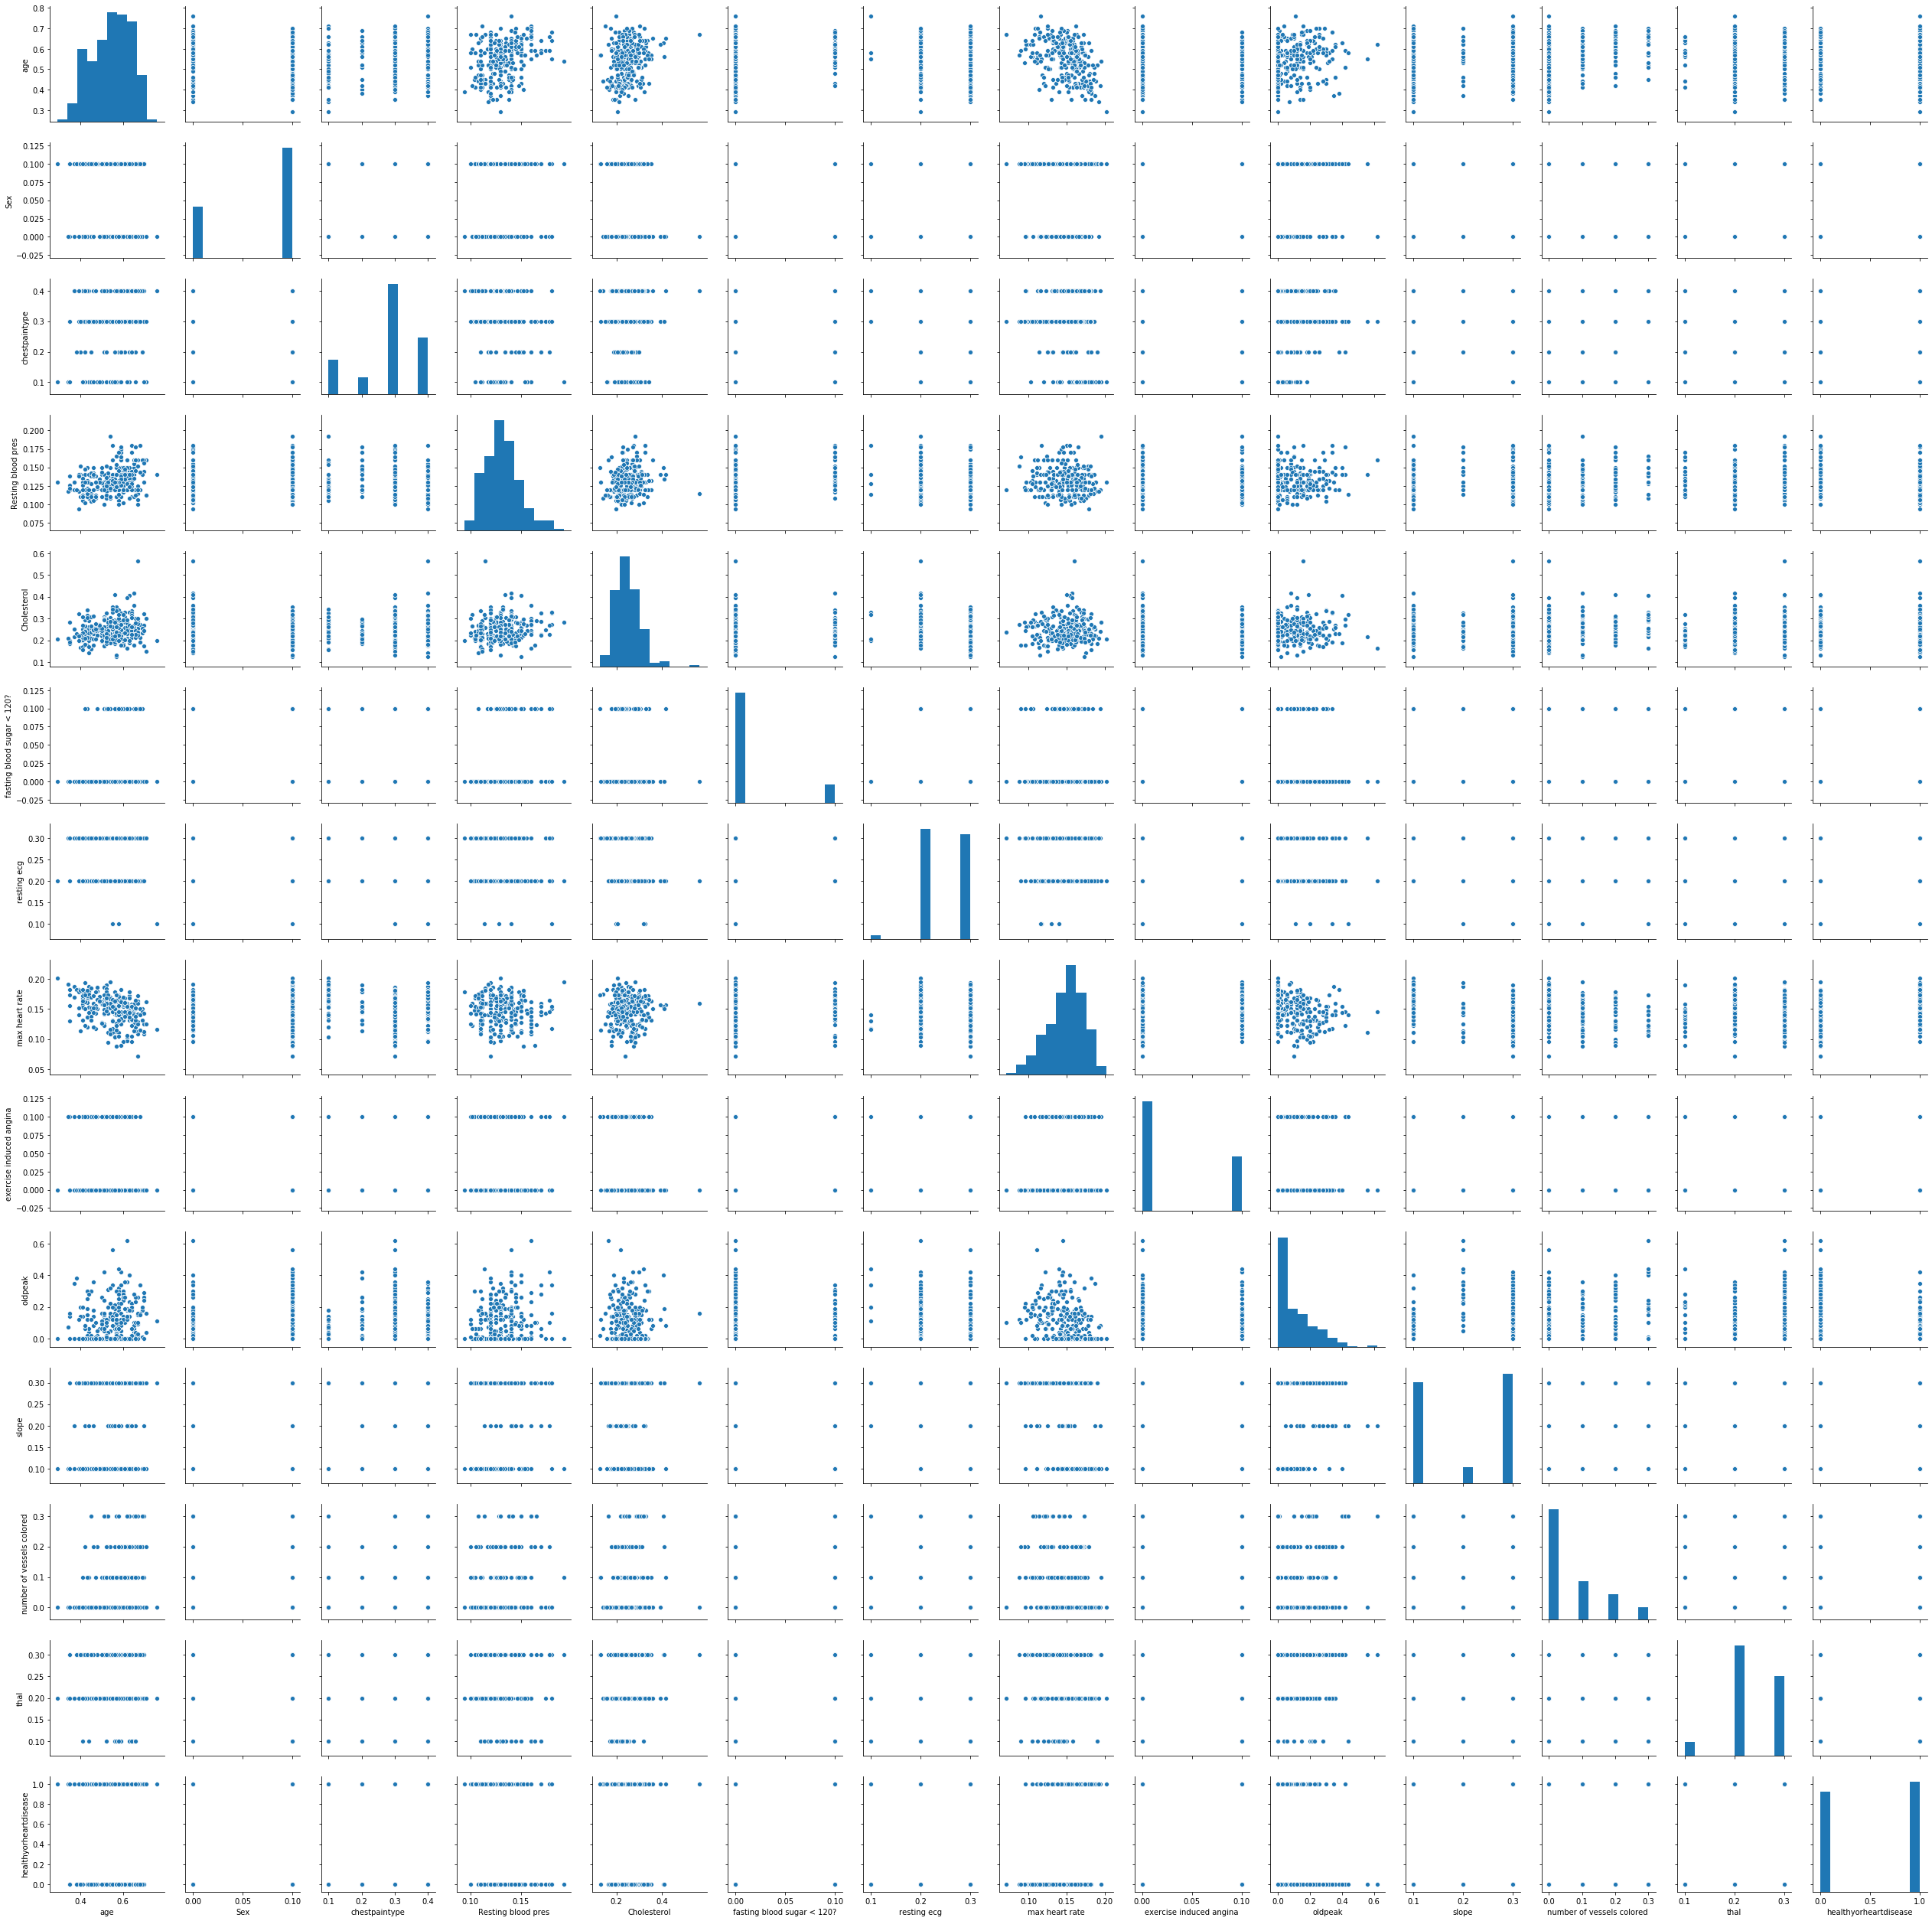

In [155]:
sns.pairplot(data=df)

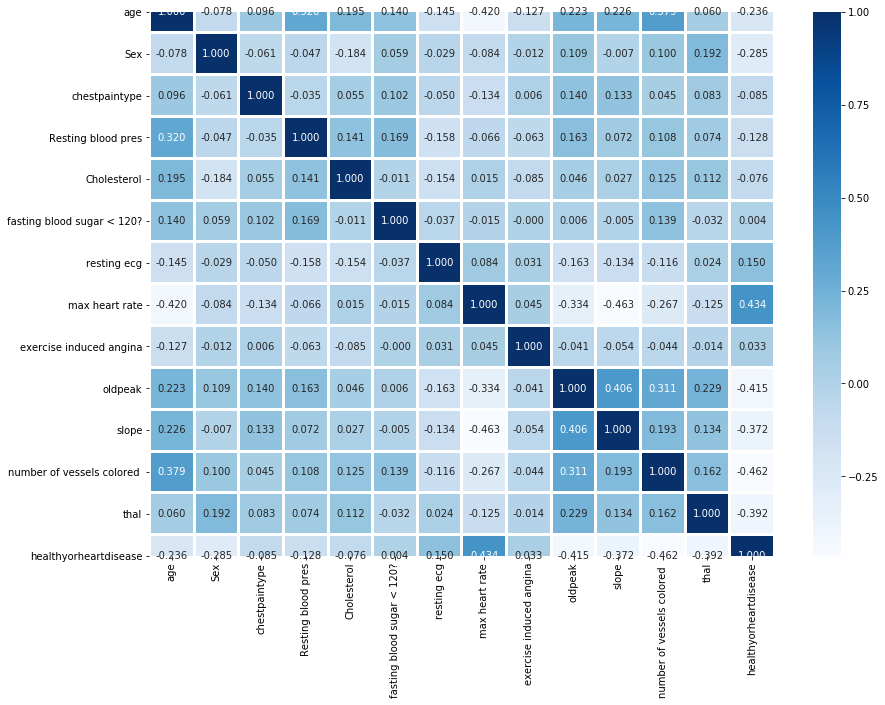

In [156]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues',fmt='.3f',linewidths=2)
plt.show()

In [157]:
df.groupby('chestpaintype',as_index=False)['healthyorheartdisease'].mean()

,chestpaintype,healthyorheartdisease
0,0.1,0.829268
1,0.2,0.700000
2,0.3,0.261538
3,0.4,0.791045


In [158]:
df.groupby('slope',as_index=False)['healthyorheartdisease'].mean()

,slope,healthyorheartdisease
0,0.1,0.730435
1,0.2,0.444444
2,0.3,0.344000


In [159]:
list(df.columns)

['age',
 'Sex',
 'chestpaintype',
 'Resting blood pres',
 'Cholesterol',
 'fasting blood sugar < 120?',
 'resting ecg',
 'max heart rate',
 'exercise induced angina',
 'oldpeak',
 'slope',
 'number of vessels colored ',
 'thal',
 'healthyorheartdisease']

In [160]:
df.groupby('thal',as_index=False)['healthyorheartdisease'].mean()

,thal,healthyorheartdisease
0,0.1,0.352941
1,0.2,0.778571
2,0.3,0.198020


In [161]:
df.groupby('healthyorheartdisease').mean()

,age,Sex,chestpaintype,Resting blood pres,Cholesterol,fasting blood sugar < 120?,resting ecg,max heart rate,exercise induced angina,oldpeak,slope,number of vessels colored,thal
healthyorheartdisease,,,,,,,,,,,,,
0,0.566992,0.082114,0.295122,0.134439,0.252862,0.013821,0.238211,0.138252,0.031707,0.161870,0.241463,0.113008,0.256911
1,0.524222,0.055556,0.278519,0.130007,0.244852,0.014074,0.254074,0.158800,0.034815,0.063926,0.169630,0.025926,0.210370


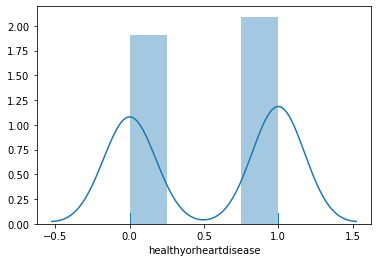

In [162]:
sns.distplot(df['healthyorheartdisease'],rug=True)
plt.show()

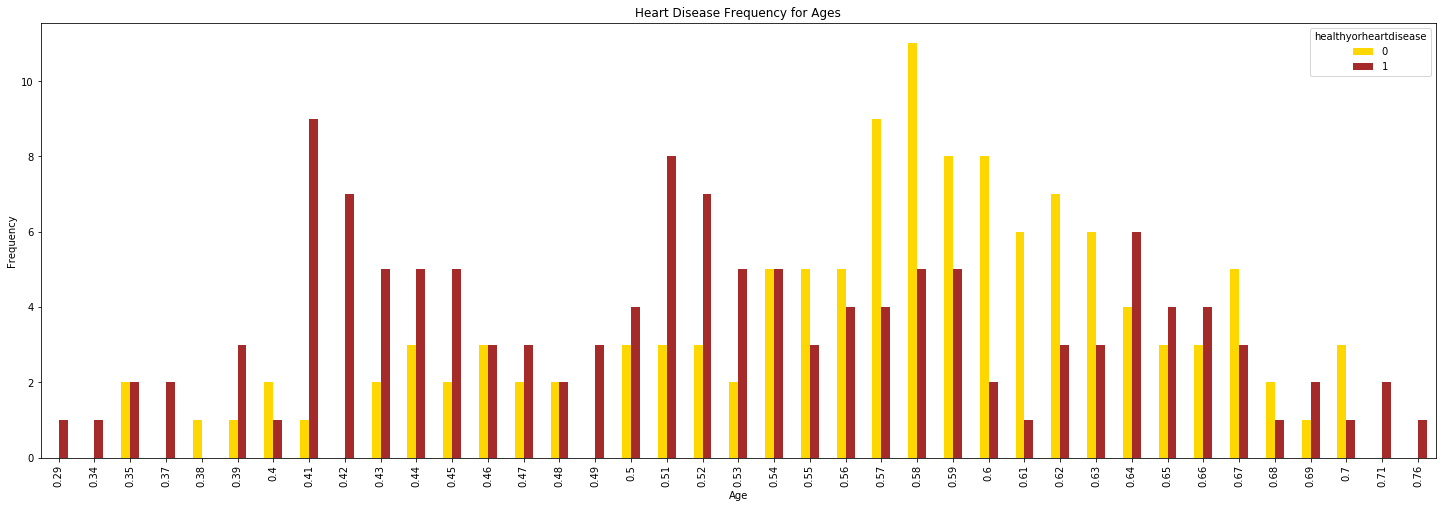

In [163]:
pd.crosstab(df.age,df.healthyorheartdisease).plot(kind="bar",figsize=(25,8),color=['gold','brown' ])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [164]:
df.columns

Index(['age', 'Sex', 'chestpaintype', 'Resting blood pres', 'Cholesterol',
       'fasting blood sugar < 120?', 'resting ecg', 'max heart rate',
       'exercise induced angina', 'oldpeak', 'slope',
       'number of vessels colored ', 'thal', 'healthyorheartdisease'],
      dtype='object')

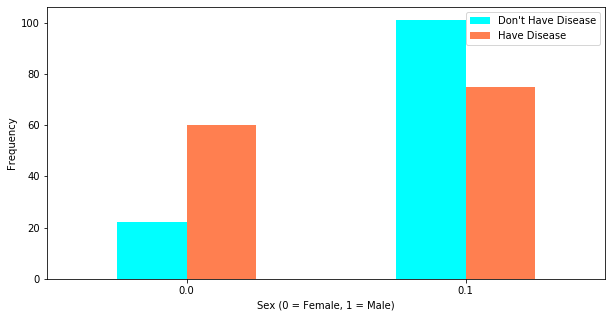

In [165]:
pd.crosstab(df.Sex,df.healthyorheartdisease).plot(kind="bar",figsize=(10,5),color=['cyan','coral' ])
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't Have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Relation of tresbps with target')

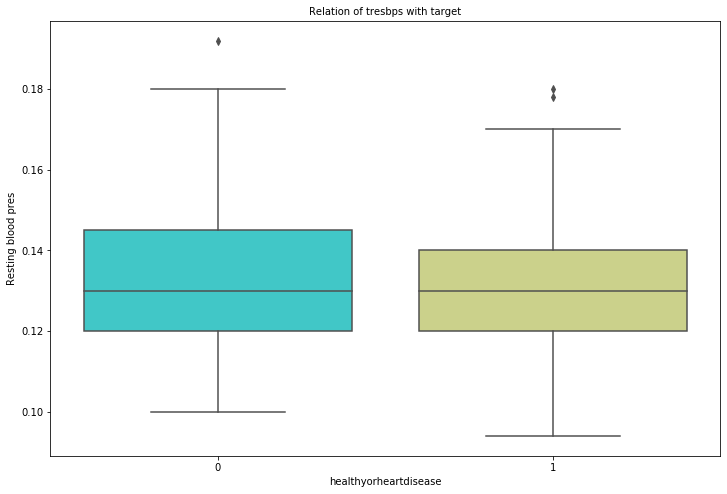

In [166]:
plt.figure(figsize=(12,8))
sns.boxplot(df['healthyorheartdisease'], df['Resting blood pres'], palette = 'rainbow')
plt.title('Relation of tresbps with target', fontsize = 10)

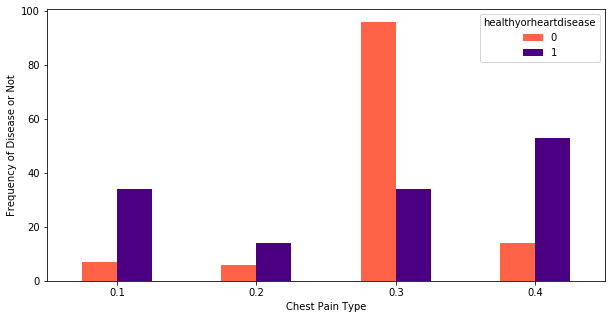

In [167]:
pd.crosstab(df.chestpaintype,df.healthyorheartdisease).plot(kind="bar",figsize=(10,5),color=['tomato','indigo' ])
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [168]:
chest_pain=pd.get_dummies(df['chestpaintype'],prefix='chestpaintype',drop_first=True)
df=pd.concat([df,chest_pain],axis=1)
df.drop(['chestpaintype'],axis=1,inplace=True)
sp=pd.get_dummies(df['slope'],prefix='slope')
th=pd.get_dummies(df['thal'],prefix='thal')
rest_ecg=pd.get_dummies(df['resting ecg'],prefix='resting ecg')
frames=[df,sp,th,rest_ecg]
df=pd.concat(frames,axis=1)
df.drop(['slope','thal','resting ecg'],axis=1,inplace=True)

In [169]:
df.head()

,age,Sex,Resting blood pres,Cholesterol,fasting blood sugar < 120?,max heart rate,exercise induced angina,oldpeak,number of vessels colored,healthyorheartdisease,...,chestpaintype_0.4,slope_0.1,slope_0.2,slope_0.3,thal_0.1,thal_0.2,thal_0.3,resting ecg_0.1,resting ecg_0.2,resting ecg_0.3
0,0.63,0.1,0.145,0.233,0.1,0.150,0.0,0.23,0.0,1,...,0,0,1,0,1,0,0,0,1,0
1,0.67,0.1,0.160,0.286,0.0,0.108,0.0,0.15,0.3,0,...,0,0,0,1,0,1,0,0,1,0
2,0.67,0.1,0.120,0.229,0.0,0.129,0.0,0.26,0.2,0,...,0,0,0,1,0,0,1,0,1,0
3,0.37,0.1,0.130,0.250,0.0,0.187,0.0,0.35,0.0,1,...,1,0,1,0,0,1,0,0,0,1
4,0.41,0.0,0.130,0.204,0.0,0.172,0.1,0.14,0.0,1,...,0,1,0,0,0,1,0,0,1,0


In [170]:
X = df.drop(['healthyorheartdisease'], axis = 1)
y = df.healthyorheartdisease.values

In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [172]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [173]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras
from keras.models import Sequential
from keras.layers import Dense
import warnings

Using TensorFlow backend.


In [183]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 11, init = 'uniform', activation = 'relu', input_dim = 21))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 11, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/Users/rakshakannusami/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=21, units=11, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/Users/rakshakannusami/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=11, kernel_initializer="uniform")`
  import sys
/Users/rakshakannusami/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


In [184]:
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

/Users/rakshakannusami/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/100
206/206 [==============================] - 1s 6ms/step - loss: 0.6927 - accuracy: 0.5437
Epoch 2/100
206/206 [==============================] - 0s 408us/step - loss: 0.6904 - accuracy: 0.6602
Epoch 3/100
206/206 [==============================] - 0s 388us/step - loss: 0.6818 - accuracy: 0.8107
Epoch 4/100
206/206 [==============================] - 0s 386us/step - loss: 0.6560 - accuracy: 0.8107
Epoch 5/100
206/206 [==============================] - 0s 443us/step - loss: 0.6073 - accuracy: 0.8204
Epoch 6/100
206/206 [==============================] - 0s 487us/step - loss: 0.5376 - accuracy: 0.8204
Epoch 7/100
206/206 [==============================] - 0s 541us/step - loss: 0.4649 - accuracy: 0.8252
Epoch 8/100
206/206 [==============================] - 0s 417us/step - loss: 0.4098 - accuracy: 0.8301
Epoch 9/100
206/206 [==============================] - 0s 402us/step - loss: 0.3774 - accuracy: 0.8301
Epoch 10/100
206/206 [==============================] - 0s 531us/step - los

206/206 [==============================] - 0s 742us/step - loss: 0.2243 - accuracy: 0.9078
Epoch 80/100
206/206 [==============================] - 0s 795us/step - loss: 0.2226 - accuracy: 0.9126
Epoch 81/100
206/206 [==============================] - 0s 576us/step - loss: 0.2213 - accuracy: 0.9126
Epoch 82/100
206/206 [==============================] - 0s 785us/step - loss: 0.2199 - accuracy: 0.9126
Epoch 83/100
206/206 [==============================] - 0s 794us/step - loss: 0.2187 - accuracy: 0.9126
Epoch 84/100
206/206 [==============================] - 0s 659us/step - loss: 0.2181 - accuracy: 0.9126
Epoch 85/100
206/206 [==============================] - 0s 637us/step - loss: 0.2164 - accuracy: 0.9175
Epoch 86/100
206/206 [==============================] - 0s 544us/step - loss: 0.2155 - accuracy: 0.9175
Epoch 87/100
206/206 [==============================] - 0s 218us/step - loss: 0.2137 - accuracy: 0.9175
Epoch 88/100
206/206 [==============================] - 0s 172us/step - loss:

In [185]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

accuracy of the model:  0.8653846153846154


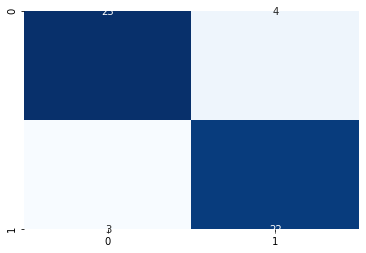

In [186]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
#accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred.round())
print('accuracy of the model: ',ac)